# h5 model evaluation

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

custom_objects = {'KerasLayer': hub.KerasLayer}

model = tf.keras.models.load_model('histopathological_model.h5', custom_objects=custom_objects)

1/1 [==============================] - 7s 7s/step
[[9.993631e-01 6.369163e-04]]


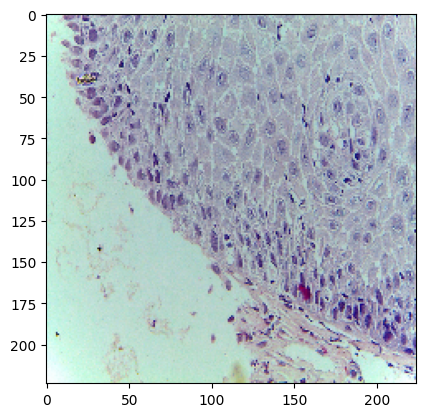

predicted class: Normal


In [3]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt


# Load and preprocess the image
image_path = 'normal_1.jpg'

image = cv2.imread(image_path)  # Load your image


input_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_LINEAR)  # Resize the image

input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Assuming your image is already in RGB format
input_image_normalized = input_image_rgb.astype(np.float32) / 255.0  # Normalize the image
input_image_array = np.expand_dims(input_image_normalized, axis=0)  # Expand dimensions to match model input

results=model.predict(input_image_array)
print(results)
p=np.argmax(results)
classnames=['Normal', 'OSCS']

prediction=classnames[p]
plt.imshow(input_image_rgb)
plt.show()
print(f'predicted class: {prediction}')

In [5]:
# import tensorflow as tf

# # Load your Keras model
# model = tf.keras.models.load_model('histopathology_model.h5')

# # Convert the model to TFLite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the converted model to a .tflite file
# with open('histo_pathology_model.tflite', 'wb') as f:
#     f.write(tflite_model)


import tensorflow as tf
import tensorflow_hub as hub

# Define the custom object scope to include the KerasLayer
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load your Keras model with custom objects
model = tf.keras.models.load_model('histopathological_model.h5', custom_objects=custom_objects)

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('histopathology_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\MyZa\AppData\Local\Temp\tmpi4y7pex0\assets


INFO:tensorflow:Assets written to: C:\Users\MyZa\AppData\Local\Temp\tmpi4y7pex0\assets


In [11]:
import cv2
import numpy as np
import tensorflow as tf
import os

# Load and preprocess the image
image_path = 'normal_2.jpg'
model_path = 'histopathology_model.tflite'

image = cv2.imread(image_path)  # Load your image


input_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_LINEAR)  # Resize the image
input_image_rgb = input_image  # Assuming your image is already in RGB format
input_image_normalized = input_image_rgb.astype(np.float32) / 255.0  # Normalize the image
input_image_array = np.expand_dims(input_image_normalized, axis=0)  # Expand dimensions to match model input

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_image_array)

# Run the model
interpreter.invoke()

# Get the results
results = interpreter.get_tensor(output_details[0]['index'])
print(results)
model_prediction=np.argmax(results)

[[0.8736546  0.12634534]]


In [12]:
if model_prediction == 0:
    print('Normal')
elif model_prediction == 1:
    print('OSCS')


Normal
